Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=DeprecationWarning)

Importing the dataset

In [ ]:
parkinsons_data=pd.read_csv('parkinsons.csv')

In [ ]:
parkinsons_data.shape

(195, 24)

In [ ]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Statistical insights

In [ ]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Exploratory Data Analysis

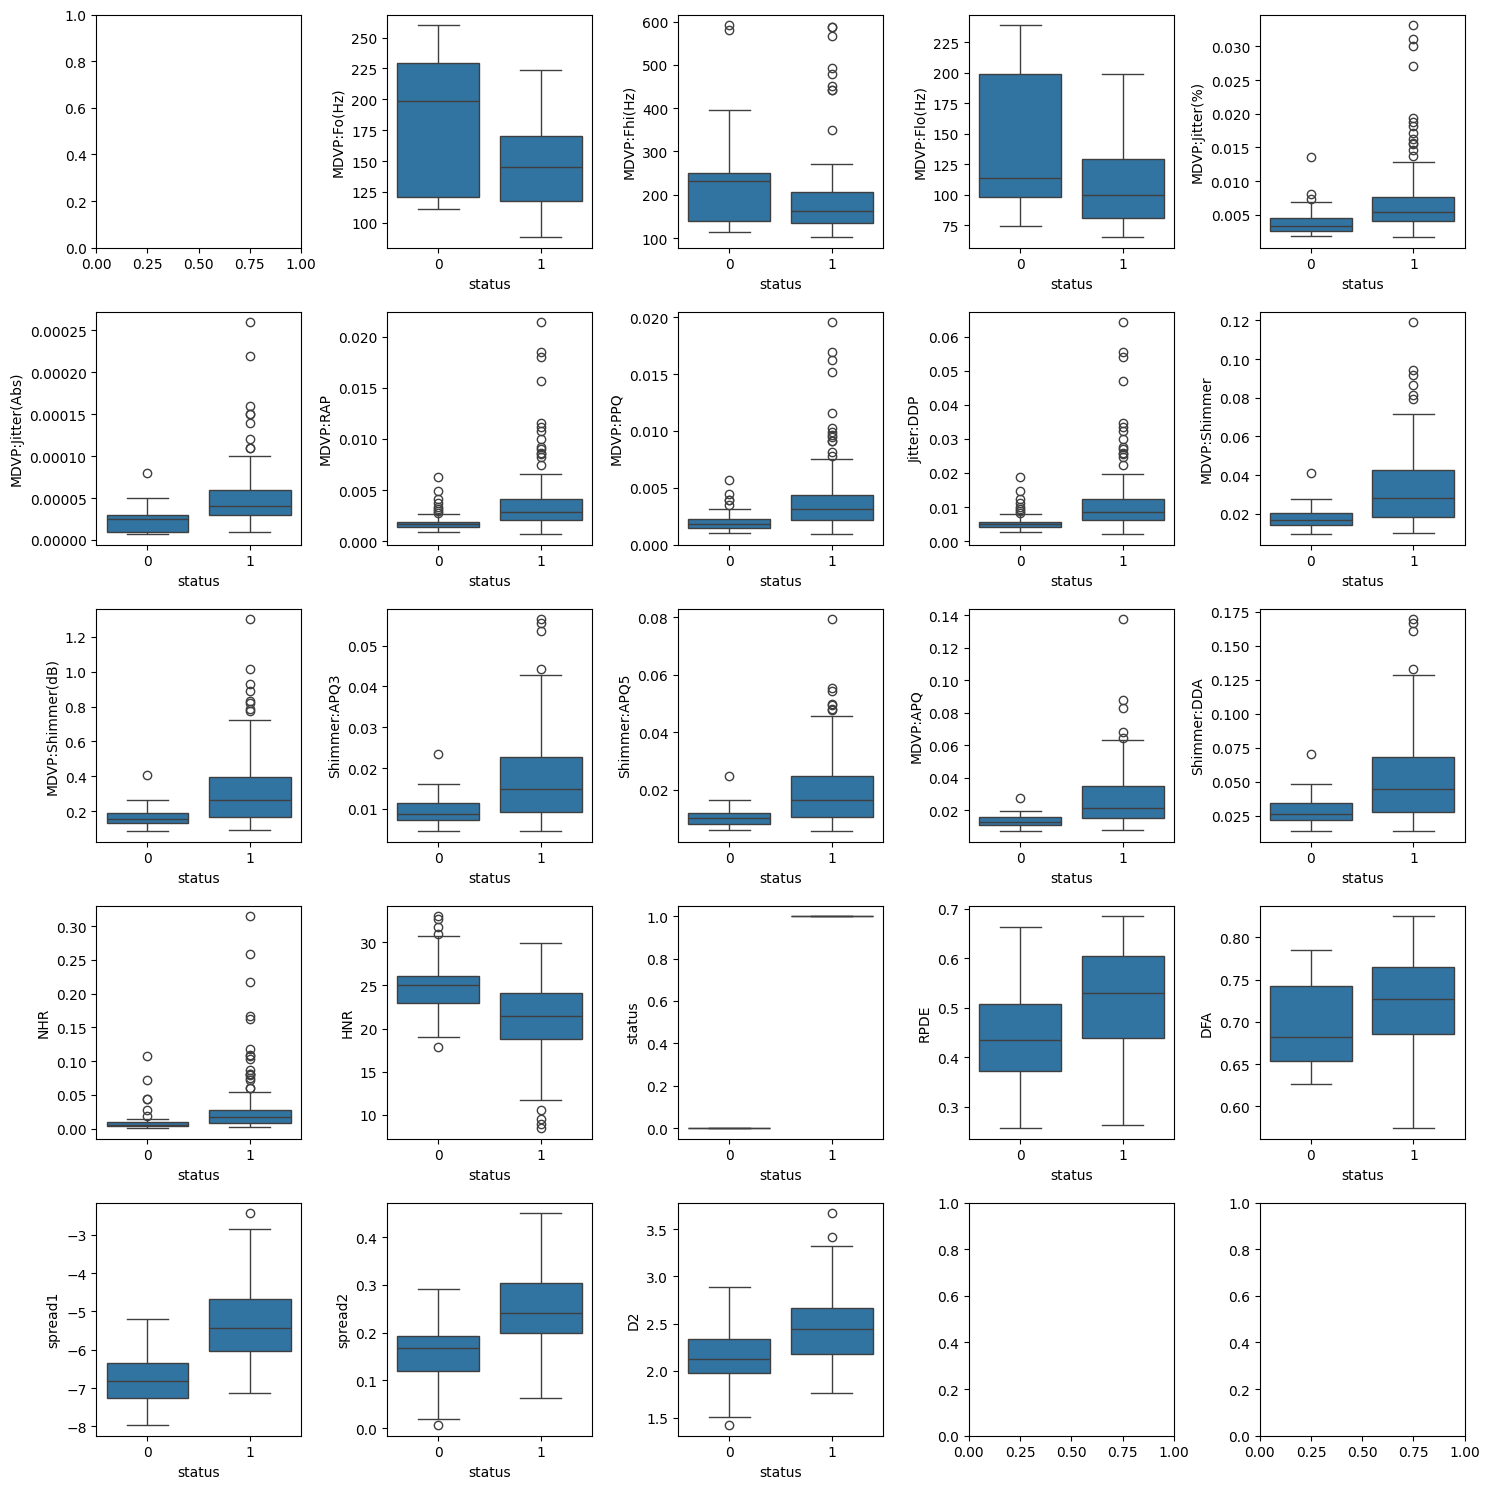

In [ ]:
fig, axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(parkinsons_data.columns)-1):
    sns.boxplot(x='status', y=parkinsons_data.iloc[:,i], data=parkinsons_data, orient='v', ax=axes[i])
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

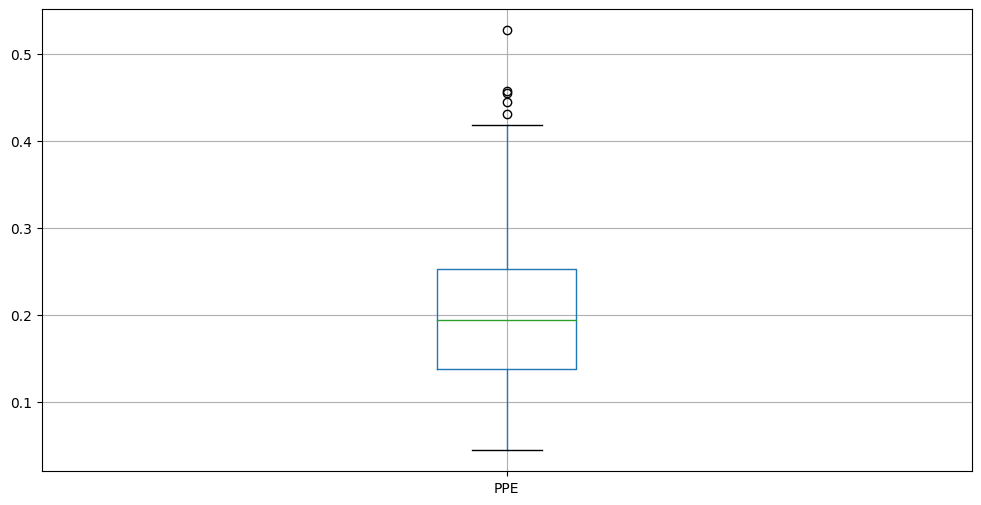

In [ ]:
parkinsons_data.boxplot(column=['PPE'])
plt.show

Data Cleaning

In [ ]:
duplicate_Values=parkinsons_data.duplicated()
print(duplicate_Values.sum())
parkinsons_data[duplicate_Values]

0


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [ ]:
print(parkinsons_data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


Correlation Analysis

Modeling


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from os import system
from sklearn import metrics

In [ ]:
X = parkinsons_data.drop(['status', 'name'], axis = 1)
Y = parkinsons_data.status

DECISION TREE MODEL

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test , y_test)
predDT = decision_tree.predict(X_test)
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



In [ ]:
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[11,  4],
       [ 2, 42]])

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Decision Tree: {}'.format(count_misclassified))

Misclassified samples in Decision Tree: 6


RANDOM FOREST

In [ ]:
randomforest = RandomForestClassifier(n_estimators = 50)
randomforest = randomforest.fit(X_train, y_train)
y_pred1 = randomforest.predict(X_test)
randomforest.score(X_test , y_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 6


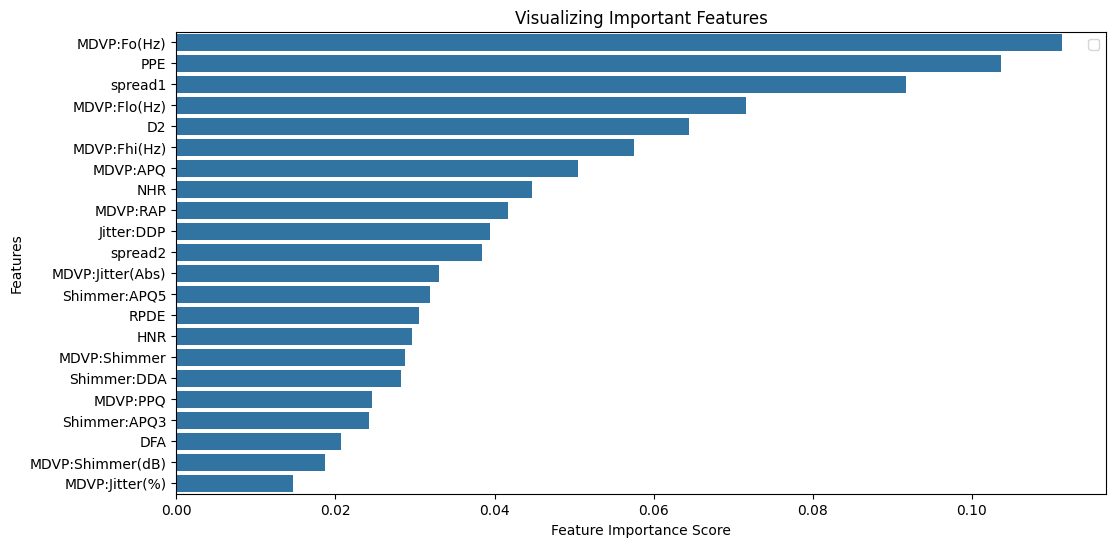

In [ ]:
feature_imp = pd.Series(randomforest.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)



0.8305084745762712

In [ ]:
y_pred2 = knn.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))
print(classification_report(y_test, y_pred2))

Misclassified samples in KNN: 6
              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.85      0.93      0.89        44

    accuracy                           0.83        59
   macro avg       0.79      0.73      0.75        59
weighted avg       0.82      0.83      0.82        59



ADABoost

In [ ]:
adb = AdaBoostClassifier( n_estimators= 50)
adb = adb.fit(X_train,y_train)
y_pred3 = adb.predict(X_test)
adb.score(X_test , y_test)


0.8983050847457628

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print(classification_report(y_test, y_pred3))
print('Misclassified samples in Ada Boosting: {}'.format(count_misclassified))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

Misclassified samples in Ada Boosting: 6


In [ ]:
from sklearn.dummy import DummyClassifier
#from sklearn.metrics import plot_confusion_matrix
clf_dummy= DummyClassifier(random_state=42)
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)
#plot_confusion_matrix(estimator=clf_dummy, X=X_test, y_true=y_test, normalize='true', cmap='Blues')

In [ ]:
y_train.value_counts(normalize=True)

status
1    0.757353
0    0.242647
Name: proportion, dtype: float64

Performance evaluation

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7457627118644068


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 0 15]
 [ 0 44]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      1.00      0.85        44

    accuracy                           0.75        59
   macro avg       0.37      0.50      0.43        59
weighted avg       0.56      0.75      0.64        59



In [ ]:
!pip install mpld3


,Metric,DT,RF,KNN,ADB
0,Accuracy,0.898305,0.932203,0.830508,0.898305
1,F1-Score,0.933333,0.955556,0.891304,0.934783
2,Recall,0.954545,0.977273,0.931818,0.977273
3,Precision,0.913043,0.934783,0.854167,0.895833


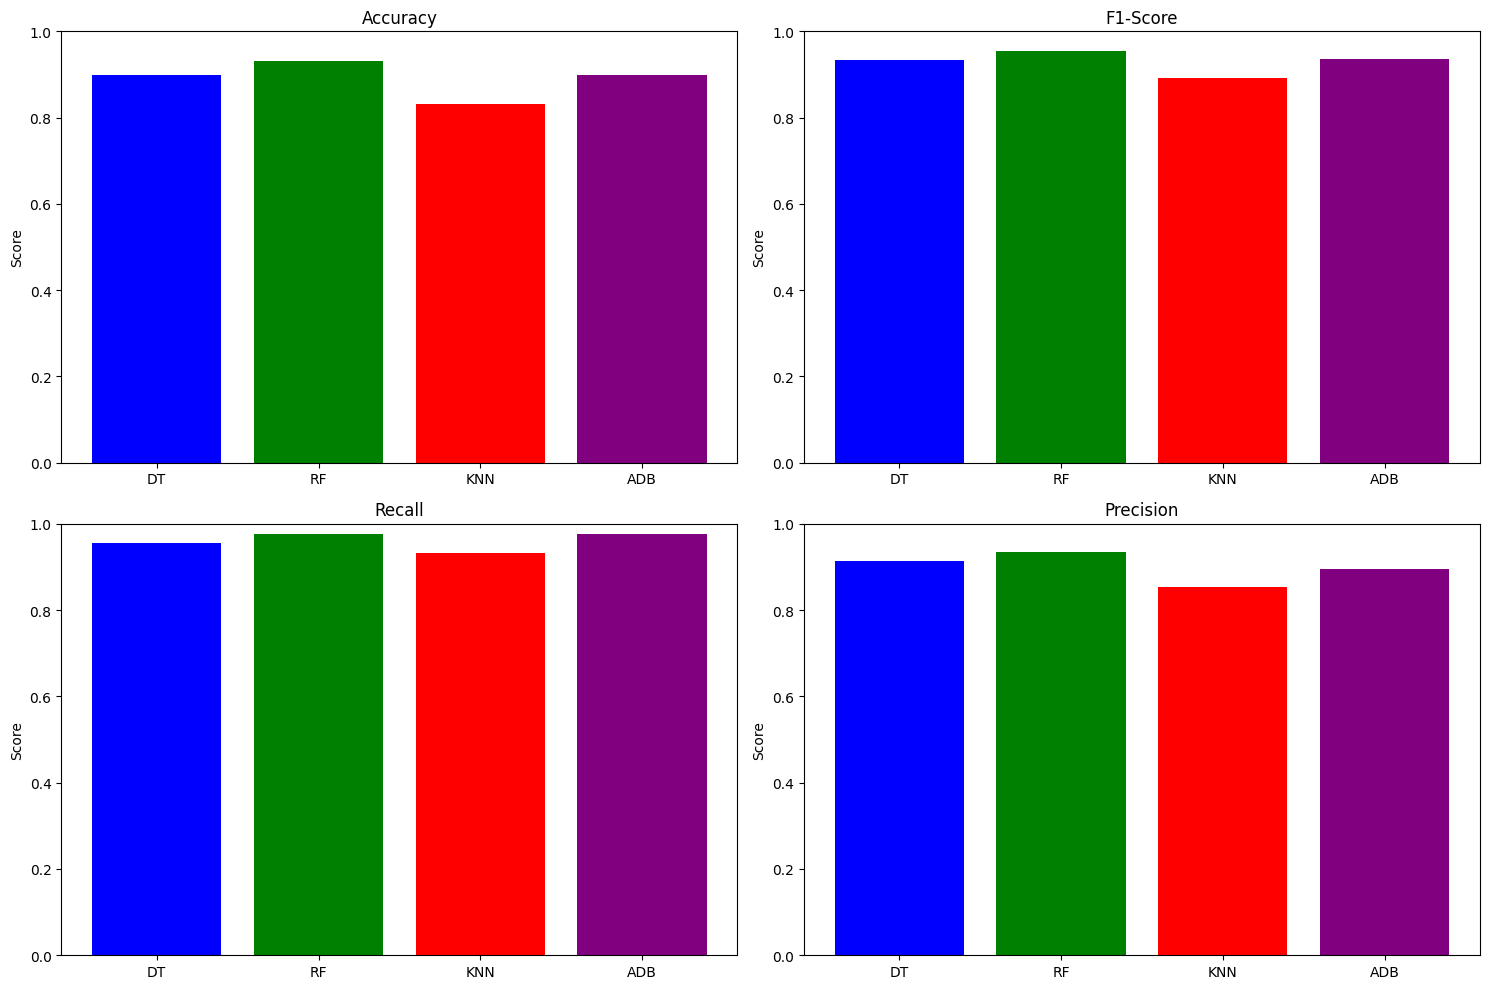

HTML(value='\n\n<style>\n\n</style>\n\n<div id="fig_el18491372305189068969223741647"></div>\n<script>\nfunctio…

<Figure size 1200x600 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, log_loss
import mpld3
from ipywidgets import HTML
data = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT)],
        'RF':[accuracy_score(y_test,y_pred1), f1_score(y_test,y_pred1), recall_score(y_test,y_pred1), precision_score(y_test,y_pred1)],
        'KNN':[accuracy_score(y_test,y_pred2), f1_score(y_test,y_pred2), recall_score(y_test,y_pred2), precision_score(y_test,y_pred2)],
        'ADB':[accuracy_score(y_test,y_pred3), f1_score(y_test,y_pred3), recall_score(y_test,y_pred3), precision_score(y_test,y_pred3)]
}
data = pd.DataFrame(data)
display(data)
import matplotlib.pyplot as plt
import numpy as np

"""Sample data
data = {
    "Metric": ["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
    "DT": [0.898305, 0.933333, 0.954545, 0.913043, 0.463636],
    "RF": [0.932203, 0.956522, 1.0, 0.916667, 0.642424],
    "KNN": [0.830508, 0.891304, 0.931818, 0.854167, 0.106061],
    "ADB": [0.898305, 0.934783, 0.977273, 0.895833, 0.463636]
}"""

# Convert data to NumPy array
metrics = data.pop("Metric")
models = list(data.keys())
values = np.array([list(data[model]) for model in models])

# Plotting
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    if i < len(metrics):
        ax.bar(models, values[:, i], color=['blue', 'green', 'red', 'purple'])
        ax.set_title(metrics[i])
        ax.set_ylabel("Score")
        ax.set_ylim(0, 1)
        ax.set_xticks(range(len(models)))  # Set the positions of the ticks on the x-axis
        ax.set_xticklabels(models)
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()

html_str = mpld3.fig_to_html(plt.gcf())

# Display the HTML string
display(HTML(html_str))



In [ ]:
#<h1 style="text-align:center"> Classification and Prediction of Parkinson's disease using Machine Learning Algorithms</h1>
#<h2 style="text-align:center">Performance Evaluation</h2>
with open('analysis.html', 'w') as f:
    f.write(html_str)
